In [187]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [188]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [189]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train = df_train.copy()
df_test = df_test.copy()


df_train = df_train.drop(['Id'],axis = 1)
# df_test = df_test.drop(['Id'],axis = 1)

display(df_train.head(), df_test.head(), df_test.tail())
print(df_train.shape)
print(df_test.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


(1460, 80)
(1459, 80)


## NA Value Treatment

In [190]:
#columns with NAs percentage count 

total_entries = len(df_train)
na_counts = df_train.isna().sum()
na_percentage = round(((na_counts / total_entries) * 100),2)
na_percentage_df = pd.DataFrame(na_percentage, columns=['Percentage of NAs'])

display(na_percentage_df)


,Percentage of NAs
MSSubClass,0.00
MSZoning,0.00
LotFrontage,17.74
LotArea,0.00
Street,0.00
Alley,93.77
LotShape,0.00
LandContour,0.00
Utilities,0.00
LotConfig,0.00


In [191]:
# dropping those columns from df_train where NAs Value is close to 50% 

#columns that has more than 47% of NAs
cols_to_drop = []
for i in na_percentage_df.index:
    if na_percentage_df.loc[i,'Percentage of NAs'] > 47:
        cols_to_drop.append(i)
        
#No of columns to be droppped
print(f'No of columns to be droppped: {len(cols_to_drop)}')

#updating the dataframe
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)

# Print the new shapes of the DataFrames to confirm columns have been dropped
print("Training DataFrame shape:", df_train.shape)
print("Testing DataFrame shape:", df_test.shape)

No of columns to be droppped: 6
Training DataFrame shape: (1460, 74)
Testing DataFrame shape: (1459, 74)


In [192]:
#replace NA with Mode

for i,j in zip(df_train.columns, df_test.columns):
    if df_train[i].isna().any() == True:
        mode_value_train = df_train[i].mode()[0]
        df_train[i].fillna(mode_value_train, inplace =True)
        
    if df_test[j].isna().any() == True:
        mode_value_test = df_test[j].mode()[0]
        df_test[j].fillna(mode_value_test, inplace =True)
        
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


/tmp/ipykernel_33/3914056113.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[i].fillna(mode_value_train, inplace =True)
/tmp/ipykernel_33/3914056113.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [193]:
#df_num
cols_to_drop = []
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        cols_to_drop.append(i)
        
columns_to_drop = cols_to_drop + ['SalePrice']
df_num = df_train.drop(columns_to_drop,axis = 1)

print(df_train.shape)
print(df_num.shape)
print(len(cols_to_drop))

(1460, 74)
(1460, 36)
37


In [194]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vifs(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Function to iteratively remove features with VIF greater than the threshold
def reduce_vif(df, threshold=6.0):
    condition = True
    while condition:
        vif_data = calculate_vifs(df)
        if vif_data['VIF'].max() > threshold:
            # Find feature with the maximum VIF and drop it
            max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
            df = df.drop(columns=[max_vif_feature])
            print(f"Dropped '{max_vif_feature}' with VIF: {vif_data['VIF'].max()}")
        else:
            condition = False
    return df, vif_data


# Apply the function
reduced_df, final_vif = reduce_vif(df_num)
print("Remaining features and their VIFs:")
display(final_vif)


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped 'BsmtFinSF1' with VIF: inf


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped '1stFlrSF' with VIF: inf
Dropped 'YrSold' with VIF: 23159.533044879514
Dropped 'YearBuilt' with VIF: 17289.568529556072
Dropped 'YearRemodAdd' with VIF: 12016.304680554937
Dropped 'GarageYrBlt' with VIF: 115.2297007213295
Dropped 'GrLivArea' with VIF: 99.33412231976848
Dropped 'TotRmsAbvGrd' with VIF: 67.54048084003624
Dropped 'OverallQual' with VIF: 48.4687757383042
Dropped 'GarageCars' with VIF: 34.37363880999643
Dropped 'KitchenAbvGr' with VIF: 25.15960713152918
Dropped 'TotalBsmtSF' with VIF: 22.27814103191614
Dropped 'BedroomAbvGr' with VIF: 19.067189688845946
Dropped 'FullBath' with VIF: 14.663731443993061
Dropped 'OverallCond' with VIF: 12.596390937555753
Dropped 'LotFrontage' with VIF: 9.570284185606699
Dropped 'GarageArea' with VIF: 7.11941800363476
Remaining features and their VIFs:


,feature,VIF
0,MSSubClass,2.755578
1,LotArea,2.344048
2,MasVnrArea,1.545905
3,BsmtFinSF2,1.180125
4,BsmtUnfSF,2.869205
5,2ndFlrSF,3.255564
6,LowQualFinSF,1.041086
7,BsmtFullBath,2.263938
8,BsmtHalfBath,1.134199
9,HalfBath,2.660566


In [195]:
feature_to_have = []
for i in final_vif['feature']:
    feature_to_have.append(i)
    
# print(feature_to_have)

#cleaned df_num
df_train_num_cleaned = pd.concat([df_train[feature_to_have],df_train['SalePrice']], axis = 1)
df_test_num_cleaned  = pd.concat([df_test[feature_to_have]], axis = 1 )

# df_num_cleaned = df_num[feature_to_have]
display(df_train_num_cleaned.head())
display(df_test_num_cleaned.head())

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,60,8450,196.0,0,150,854,0,1,0,1,0,0,61,0,0,0,0,0,2,208500
1,20,9600,0.0,0,284,0,0,0,1,0,1,298,0,0,0,0,0,0,5,181500
2,60,11250,162.0,0,434,866,0,1,0,1,1,0,42,0,0,0,0,0,9,223500
3,70,9550,0.0,0,540,756,0,1,0,0,1,0,35,272,0,0,0,0,2,140000
4,60,14260,350.0,0,490,1053,0,1,0,1,1,192,84,0,0,0,0,0,12,250000


,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,20,11622,0.0,144.0,270.0,0,0,0.0,0.0,0,0,140,0,0,0,120,0,0,6
1,20,14267,108.0,0.0,406.0,0,0,0.0,0.0,1,0,393,36,0,0,0,0,12500,6
2,60,13830,0.0,0.0,137.0,701,0,0.0,0.0,1,1,212,34,0,0,0,0,0,3
3,60,9978,20.0,0.0,324.0,678,0,0.0,0.0,1,1,360,36,0,0,0,0,0,6
4,120,5005,0.0,0.0,1017.0,0,0,0.0,0.0,0,0,0,82,0,0,144,0,0,1


### Label Encoding

In [196]:
char_cols = []
for i in df_train:
    if df_train[i].dtype =='object':
        char_cols.append(i)
        
df_train_char = df_train[char_cols]
df_test_char = df_test[char_cols]

display(df_train_char.head(),df_test_char.head())


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [197]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initializing the DataFrames for the encoded data
df_train_encoded = pd.DataFrame()
df_test_encoded = pd.DataFrame()

# Iterating over the columns in the training data DataFrame
for column in df_train_char.columns:  # Ensure both datasets have the same columns
    le = LabelEncoder()
    # Fit the encoder on the training data
    df_train_encoded[column] = le.fit_transform(df_train_char[column])
    
    # Transform test data
    # Check each category in the test set to see if it was fitted in the LabelEncoder
    df_test_encoded[column] = df_test_char[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Display the shapes of the encoded datasets
print("Shapes of Encoded Datasets:", df_train_encoded.shape, df_test_encoded.shape)

# Display the first few rows of the encoded datasets
display(df_train_encoded.head())
display(df_test_encoded.head())


Shapes of Encoded Datasets: (1460, 37) (1459, 37)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,0,2,1,1,12,13,3,4,1,3,3,3,4,3,1,4,1,4,3,6,1,2,4,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,0,2,3,1,13,14,3,4,1,3,3,3,0,5,1,4,1,4,2,6,1,2,4,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,0,5,1,1,12,13,3,4,2,2,3,3,2,5,1,2,1,4,3,6,1,0,4,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,0,5,1,1,12,13,3,4,2,3,3,3,2,5,1,0,1,4,2,6,1,0,4,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,4,2,1,1,6,6,2,4,2,2,3,3,0,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [198]:
df_train_preprocessed = pd.concat([df_train_num_cleaned,df_encoded], axis = 1 )
df_test_preprocessed = pd.concat([df_test_num_cleaned,df_encoded], axis = 1 )

display(df_train_preprocessed.head(),df_test_preprocessed.head())

display(df_train_preprocessed.shape,df_test_preprocessed.shape)

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,8450,196.0,0,150,854,0,1,0,1,0,0,61,0,0,0,0,0,2,208500,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,20,9600,0.0,0,284,0,0,0,1,0,1,298,0,0,0,0,0,0,5,181500,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,60,11250,162.0,0,434,866,0,1,0,1,1,0,42,0,0,0,0,0,9,223500,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,70,9550,0.0,0,540,756,0,1,0,0,1,0,35,272,0,0,0,0,2,140000,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,60,14260,350.0,0,490,1053,0,1,0,1,1,192,84,0,0,0,0,0,12,250000,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20.0,11622.0,0.0,144.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,20.0,14267.0,108.0,0.0,406.0,0.0,0.0,0.0,0.0,1.0,0.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,60.0,13830.0,0.0,0.0,137.0,701.0,0.0,0.0,0.0,1.0,1.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,60.0,9978.0,20.0,0.0,324.0,678.0,0.0,0.0,0.0,1.0,1.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,120.0,5005.0,0.0,0.0,1017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


(1460, 57)

(1460, 56)

In [199]:
X = df_train_preprocessed.drop(['SalePrice'], axis = 1)
y = df_train_preprocessed['SalePrice']

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 1 Linear regression

In [201]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Create a pipeline with PolynomialFeatures and LinearRegression
linear_regression = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())

y_train_pred = cross_val_predict(linear_regression, X_train, y_train, cv=10)

linear_regression.fit(X_train,y_train)
y_pred = linear_regression.predict(X_test)

print("RMSE - Train Set:", np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE - Test Set:", np.sqrt(mean_squared_error(y_test,y_pred)))
print('')
print("R2 - Train Set:", r2_score(y_train,y_train_pred))
print("R2 - Test Set:", r2_score(y_test,y_pred))

RMSE - Train Set: 40430.92474253145
RMSE - Test Set: 40221.88250393365

R2 - Train Set: 0.7259374854003431
R2 - Test Set: 0.7890833077419368


### 2. RandomForest Regressor

In [202]:
from sklearn.ensemble import RandomForestRegressor

y_train_pred = cross_val_predict(RandomForestRegressor(n_estimators = 400, max_depth =5, random_state = 42), X_train, y_train, cv=10)

rfr = RandomForestRegressor(n_estimators = 400,max_depth =5, random_state = 42)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

print("RMSE - Train Set:", np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE - Test Set:", np.sqrt(mean_squared_error(y_test,y_pred)))

print('')
print("R2 - Train Set:", r2_score(y_train,y_train_pred))
print("R2 - Test Set:", r2_score(y_test,y_pred))

RMSE - Train Set: 41482.58587790279
RMSE - Test Set: 41476.62761344647

R2 - Train Set: 0.7114946103978097
R2 - Test Set: 0.7757187123837611


Feature importances:
ExterQual: 0.37429748862171264
BsmtQual: 0.17127606748344837
2ndFlrSF: 0.10622077790773461
LotArea: 0.09914262561643891
KitchenQual: 0.05389148241629957
GarageFinish: 0.03760125505086379
Fireplaces: 0.03684579957388993
MasVnrArea: 0.029115094223160786
Neighborhood: 0.009754558486268624
CentralAir: 0.009551958903064145
OpenPorchSF: 0.008622732232180028
WoodDeckSF: 0.008428695680746466
BsmtUnfSF: 0.004924813100669107
ScreenPorch: 0.004609031691865455
PoolArea: 0.003609618950354887
LandContour: 0.0033854085826022827
Exterior1st: 0.003098131533486167
MSZoning: 0.002863363291533375
BsmtExposure: 0.002664028254839464
BsmtFinType1: 0.0023510841818868123
GarageType: 0.002347266857429491
Exterior2nd: 0.002159472199972032
MSSubClass: 0.0018667860956875742
LandSlope: 0.001607787640154144
MoSold: 0.0015265069085149913
SaleCondition: 0.0015066145085585888
PavedDrive: 0.0014767456828633236
LotConfig: 0.0013412318530633862
ExterCond: 0.0012531037738535246
HeatingQC: 0.00121237690

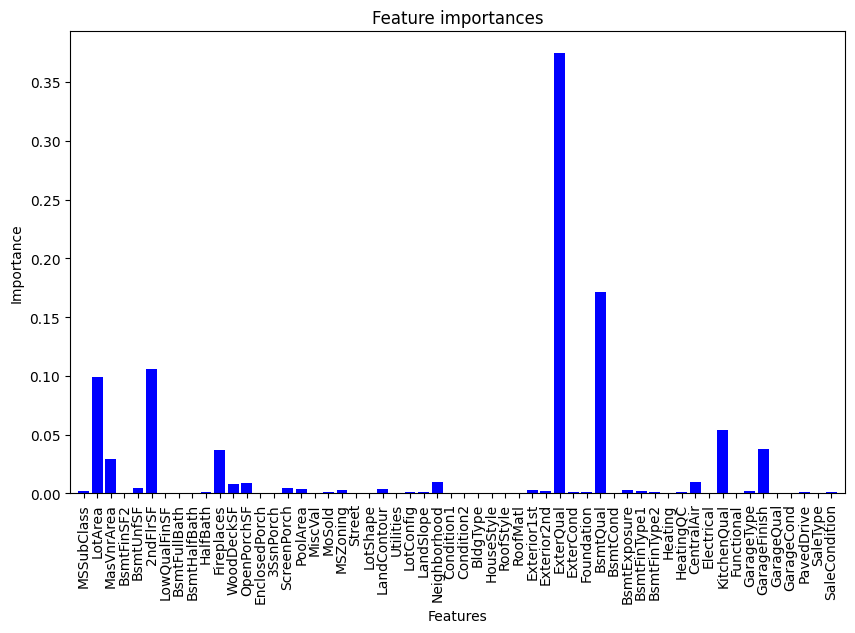

In [203]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rfr.feature_importances_

# Get feature names from the column names of your dataset
feature_names = list(X.columns)

# Pair feature names with their importances
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sort feature importances in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Print feature importance pairs
print("Feature importances:")
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")
    

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(len(feature_names)), feature_importances, color="b", align="center")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlim([-1, len(feature_names)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

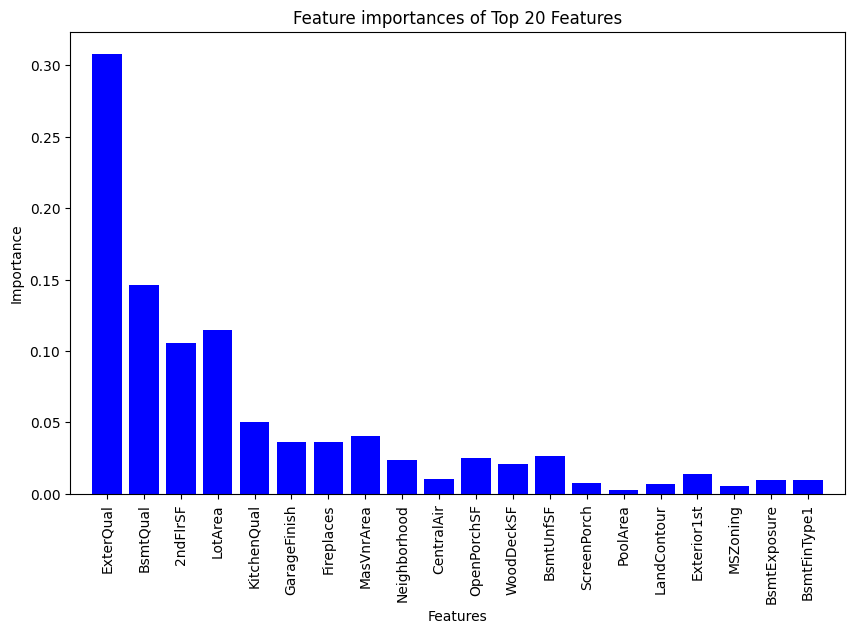

RMSE with top 20 features: 36546.636390018946

R2 - Train Set: 0.7114946103978097
R2 - Test Set: 0.8258670367666056


In [204]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming rfr is your previously trained RandomForestRegressor model
# Assuming X is your feature set and y is your target variable

# Step 1: Get feature importances and sort them
feature_importances = rfr.feature_importances_
feature_names = list(X.columns)
feature_importance_pairs = list(zip(feature_names, feature_importances))
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Select top 20 features
top_features = [feature for feature, _ in feature_importance_pairs[:20]]
# print("Top 20 Features:", top_features)

# Step 2: Subset the dataset to include only top 20 features
X_top = X[top_features]

# Step 3: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Re-train RandomForest Regressor
rfr_top = RandomForestRegressor(n_estimators=500, random_state=42)
rfr_top.fit(X_train, y_train)

# Step 4: Get new feature importances and plot them
new_feature_importances = rfr_top.feature_importances_

plt.figure(figsize=(10,6))
plt.title("Feature importances of Top 20 Features")
plt.bar(range(len(top_features)), new_feature_importances, color="b", align="center")
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlim([-1, len(top_features)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Optionally, evaluate the model's performance
from sklearn.metrics import mean_squared_error
y_pred = rfr_top.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE with top 20 features:", rmse)



print('')
print("R2 - Train Set:", r2_score(y_train,y_train_pred))
print("R2 - Test Set:", r2_score(y_test,y_pred))

## Submission

In [207]:
df_test_final = df_test_preprocessed[top_features]

for i in df_test_final.columns:
    if df_test_final[i].isna().any():
        mean_value = df_test_final[i].mean()
        df_test_final.fillna(mean_value, inplace = True)
        
# df_test_final.isna().sum()
df_test_final.shape

/tmp/ipykernel_33/1837478696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final.fillna(mean_value, inplace = True)


(1460, 20)

In [206]:
y_pred = rfr_top.predict(df_test_final)
test_ids = df_test['Id']

submission_df = pd.DataFrame({
    'Id': test_ids,             
    'SalePrice': y_pred          
})

# Save the DataFrame to a CSV file without the index column
submission_csv_path = 'submission.csv'  
submission_df.to_csv(submission_csv_path, index=False)

print(f"Submission file is ready and saved to {submission_csv_path}")

ValueError: array length 1460 does not match index length 1459

### 3 XGBM Regressor

### 4 Stacking

In [14]:
# categorical_column = 
# hierarchial_column =. 